# Dados reais

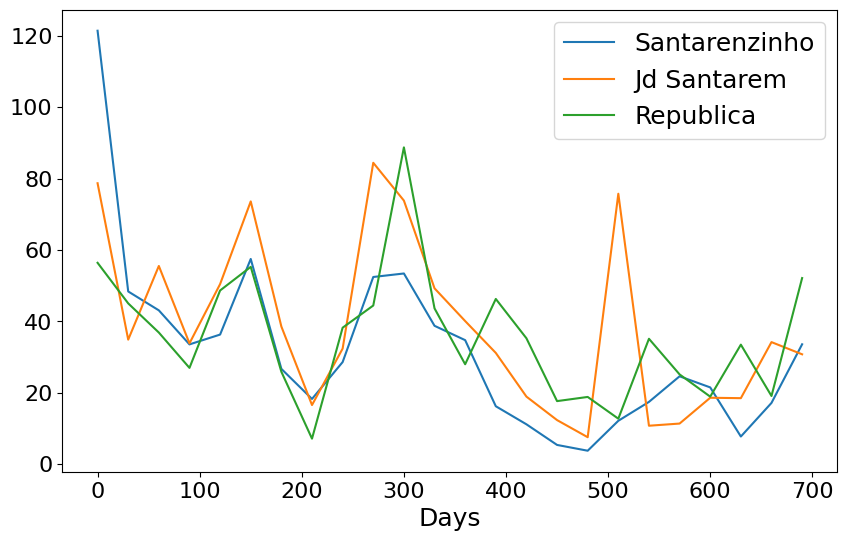

In [19]:

import matplotlib.pyplot as plt
days = [0,30,60,90,120,150,180,210,240,270,300,330,360,390,420,450,480,510,540,570,600,630,660,690]
SantarenzinhoOVT = [121.4237288136,48.3739130435,43.0833333333,33.5462184874,36.2966101695,57.4786324786,26.6890756303,18.2627118644,28.5916666667,52.4310344828,53.4117647059,38.7521367521,34.7333333333,16.218487395,11.1583333333,5.3781512605,3.756302521,12.1428571429,17.4358974359,24.6083333333,21.4957983193,7.7333333333,17.15,33.575]
JdSantaremOVT = [78.696969697,34.8782608696,55.5142857143,33.8376068376,50.4396551724,73.6016949153,38.5480769231,16.5546218487,32.3697478992,84.425,73.8319327731,49.25,40.0833333333,31.1596638655,18.9166666667,12.3361344538,7.5416666667,75.75,10.7583333333,11.3666666667,18.5966386555,18.4789915966,34.1848739496,30.7666666667]
RepublicaOVT = [56.4033613445,45.0341880342,36.8644067797,26.9663865546,48.6517857143,55.2672413793,25.8782608696,7.1355932203,38.225,44.4382022472,88.7457627119,43.6324786325,27.9827586207,46.275862069,35.2605042017,17.6554621849,18.8235294118,12.731092437,35.1176470588,25.1355932203,18.906779661,33.475,19.0916666667,52.1271186441]
plt.figure(figsize=(10, 6))
plt.plot(days,SantarenzinhoOVT,label='Santarenzinho')
plt.plot(days,JdSantaremOVT,label='Jd Santarem')
plt.plot(days,RepublicaOVT,label='Republica')
plt.legend(fontsize=18)
plt.xlabel("Days", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()





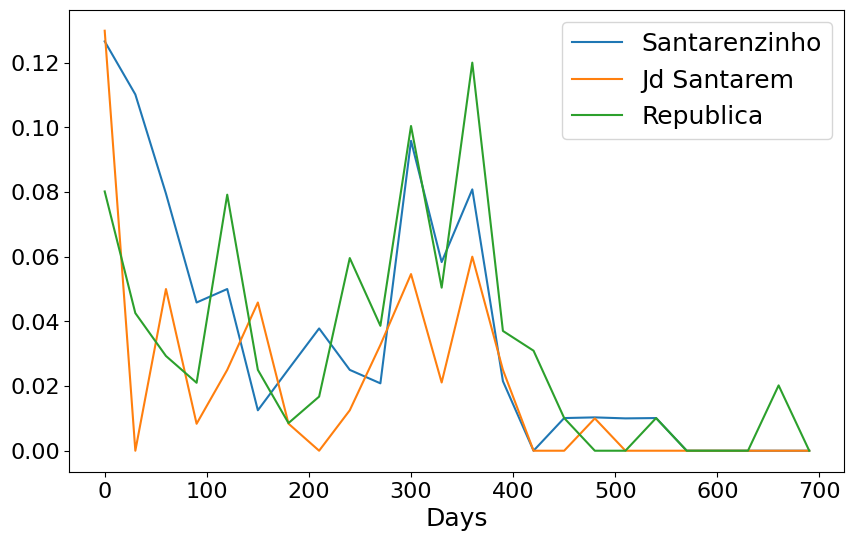

In [20]:
import matplotlib.pyplot as plt
days = [0,30,60,90,120,150,180,210,240,270,300,330,360,390,420,450,480,510,540,570,600,630,660,690]
SantarenzinhoADT = [0.1265822785,0.1101694915,0.0794979079,0.0458333333,0.05,0.0125,0.025210084,0.0378151261,.025,0.0208333333,0.0958333333,0.0583333333,0.0808080808,0.0215053763,0,0.0101010101,0.0103092784,0.01,0.0101010101,0,0,0,0,0]
JdSantaremADT = [0.1298701299,0,0.05,0.0083333333,.025,0.0458333333,0.0083682008,0,0.0125,0.0327102804,0.0546218487,0.0210970464,0.06,.025,0,0,0.01,0,0,0,0,0,0,0]
RepublicaADT = [0.0801687764,0.0425531915,0.0292887029,0.0210084034,0.0791666667,.025,0.0085470085,0.0167364017,0.0595744681,0.0386266094,0.10041841,0.0504201681,0.12,0.037037037,0.0309278351,0.0101010101,0,0,0.0101010101,0,0,0,0.0202020202,0]
plt.figure(figsize=(10, 6))
plt.plot(days,SantarenzinhoADT,label='Santarenzinho')
plt.plot(days,JdSantaremADT,label='Jd Santarem')
plt.plot(days,RepublicaADT,label='Republica')
plt.legend(fontsize=18)
plt.xlabel("Days", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Equilibrios dia a dia

## Proporções

### Funções de contagem de pixels:

In [21]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import math as m
COLORSmap = (
    (156, 192, 249), #water
    (250, 250, 250), #street
    (232, 234, 237), #house
    (253, 226, 147), #main street
    (168,218,181), #parks
    (254,247,224), #also houses
    (252,232,230), #also houses
)

def closest_color_map(rgb):
    r, g, b = rgb
    color_diffs = []
    for color in COLORSmap:
        cr, cg, cb = color
        color_diff = m.sqrt((r - cr)**2 + (g - cg)**2 + (b - cb)**2)
        color_diffs.append((color_diff, color))
    return min(color_diffs)[1]


def isGreen(rgb,mapColor):
    r, g, b = rgb
    if g>r and g>b: #green tone
        if closest_color_map(mapColor) != (156, 192, 249): #is not water
            return True
    return False

def getVectorFromRGBPoints(rgbPointsMap,rgbPointsSat):
    numPoints = len(rgbPointsMap)
    parks = 0
    streets = 0
    water = 0
    for pointSat,pointMap in zip(rgbPointsSat,rgbPointsMap):
        print(pointSat,pointMap)
        if closest_color_map(pointMap) in [(250, 250, 250),(253, 226, 147)]:
            #print(pointMap,'street')
            streets+=1
        elif isGreen(pointSat,pointMap):
            #print(pointMap,'park')
            parks+=1
        elif closest_color_map(pointMap) == (156, 192, 249):
            #print(pointMap,'water')
            water+=1
    houses = numPoints - parks - streets - water
    return [water,parks,streets,houses]#agua,parque, rua, casa

def getVectorFromRegion(mapC,mapS,region):

    dims = mapC.size
    xSize = dims[0]
    ySize = dims[1]

    rgbPointsMap = []
    rgbPointsSat = []
    polygon = Polygon(region)
    #get max x from region
    maxX = int(np.floor(max([x for x,y in region])))
    minX = int(np.floor(min([x for x,y in region])))
    maxY = int(np.ceil(max([y for x,y in region])))
    minY = int(np.ceil(min([y for x,y in region])))
    for x in range(minX,maxX):
        for y in range(minY,maxY):
            point = Point(x,y)
            if polygon.contains(point):
                rgbPointsMap.append(mapC.getpixel((x,y))[0:3])
                rgbPointsSat.append(mapS.getpixel((x,y))[0:3])

    return getVectorFromRGBPoints(rgbPointsMap,rgbPointsSat)


### Definição dos elementos:

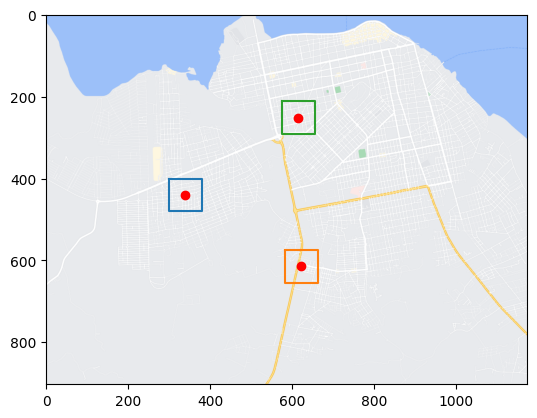

In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#Atualizar tamanho aqui:
TAM = 40
#800x800m

mapC = Image.open("MapCropped.png")
mapS = Image.open("SatelCropped.png")
dims = mapC.size
xSize = dims[0]
ySize = dims[1]
points = [[340, 440], [623, 614], [616, 251]] #Santarenzinho,JdSantarem,Republica
regions = []
plt.imshow(mapC)
plt.scatter([a[0] for a in points],[a[1] for a in points],c='r') 
for p in points:
    region = [[p[0]-TAM,p[1]-TAM],[p[0]+TAM,p[1]-TAM],[p[0]+TAM,p[1]+TAM],[p[0]-TAM,p[1]+TAM]]
    xs = [
        a[0] for a in region] + [region[0][0]]
    ys = [a[1] for a in region] + [region[0][1]]
    plt.plot(xs,ys)
    regions.append(region)
plt.show()

### Contagem:

In [23]:
proportions = []
for r in regions:
    print(r)
    proportions.append(getVectorFromRegion(mapC,mapS,r))

[[300, 400], [380, 400], [380, 480], [300, 480]]
(157, 129, 114) (222, 224, 227)
(165, 134, 116) (255, 255, 255)
(172, 150, 132) (255, 255, 255)
(167, 151, 132) (255, 255, 255)
(134, 125, 104) (255, 255, 255)
(99, 95, 75) (255, 255, 255)
(62, 65, 44) (242, 242, 244)
(74, 81, 58) (238, 239, 241)
(83, 87, 66) (231, 233, 235)
(99, 101, 82) (230, 232, 235)
(111, 106, 86) (232, 234, 237)
(127, 117, 96) (232, 234, 237)
(149, 134, 116) (232, 234, 237)
(148, 136, 116) (221, 224, 227)
(149, 137, 117) (253, 253, 253)
(149, 139, 116) (247, 248, 249)
(137, 129, 106) (223, 226, 229)
(123, 117, 98) (232, 234, 237)
(123, 113, 91) (232, 234, 237)
(99, 91, 72) (232, 234, 237)
(124, 114, 93) (232, 234, 237)
(118, 105, 85) (232, 234, 237)
(171, 160, 138) (224, 227, 230)
(179, 168, 146) (248, 248, 249)
(163, 146, 124) (250, 251, 251)
(154, 141, 117) (223, 225, 229)
(112, 98, 77) (232, 234, 237)
(111, 101, 82) (232, 234, 237)
(116, 103, 83) (232, 234, 237)
(114, 100, 77) (232, 234, 237)
(136, 117, 92) (232

In [24]:
proportions

[[0, 154, 1369, 4718], [0, 613, 1153, 4475], [0, 64, 1435, 4742]]

In [25]:
proportions[0]  = proportions[0]/np.sum(proportions[0])
proportions[1]  = proportions[1]/np.sum(proportions[1])
proportions[2]  = proportions[2]/np.sum(proportions[2])
proportions #agua,parque,rua,casa

[array([0.        , 0.02467553, 0.21935587, 0.75596859]),
 array([0.        , 0.09822144, 0.18474603, 0.71703253]),
 array([0.        , 0.01025477, 0.2299311 , 0.75981413])]

In [26]:

#Proporções (agua,parque, rua, casa):
santarenzinho = proportions[0] #gerar esses valores por contagem
jdSantarem = proportions[1]
republica = proportions[2]
matProporcoes = np.matrix([santarenzinho,jdSantarem,republica])



In [27]:
matProporcoes

matrix([[0.        , 0.02467553, 0.21935587, 0.75596859],
        [0.        , 0.09822144, 0.18474603, 0.71703253],
        [0.        , 0.01025477, 0.2299311 , 0.75981413]])

In [28]:
from scipy import optimize
from scipy import stats

## Fase ovo

In [29]:
O_parque, O_rua, O_agua, O_casa = [],[],[],[]
for t in range(len(SantarenzinhoOVT)):
    vetOvo = [SantarenzinhoOVT[t],JdSantaremOVT[t],RepublicaOVT[t]]
    def f(x):
        return np.linalg.norm(matProporcoes@x - vetOvo)
    result = optimize.minimize(f, [0,0,0,0], bounds=[(0,None),(0,None),(0,None),(0,None)])
    print(result.x,result.fun)
    O_agua.append(result.x[0])
    O_parque.append(result.x[1])
    O_rua.append(result.x[2])
    O_casa.append(result.x[3])

[  0.          36.72592918   0.         112.76323391] 46.43938036197199
[  0.           0.         202.85838457   0.        ] 4.936189147702803
[  0.         221.68499774   0.          47.45197493] 2.2921500187907564
[ 0.         72.81527504  0.         37.91962013] 4.059669273922385
[  0.         164.84207504 179.0663811    0.        ] 9.196362222786593
[  0.         324.71177006 225.71735711   0.        ] 0.060304538495136346
[  0.         200.34814715 101.64476381   0.        ] 0.7187549470819479
[ 0.         71.68914471  0.         14.52436814] 7.259527408314941
[  0.          44.70283544 147.15099862   0.        ] 6.2476057017365605
[  0.         474.63810647   0.          52.89214009] 0.9667685244247956
[  0.         130.30040311 313.69108626   0.        ] 24.279541064995172
[ 0.         71.14146808  2.78863838 56.85868324] 6.7363828495338565
[  0.         135.34482647   0.          37.97410331] 3.5369554366505733
[  0.           0.13234538 122.91972616   7.11345104] 20.738677081

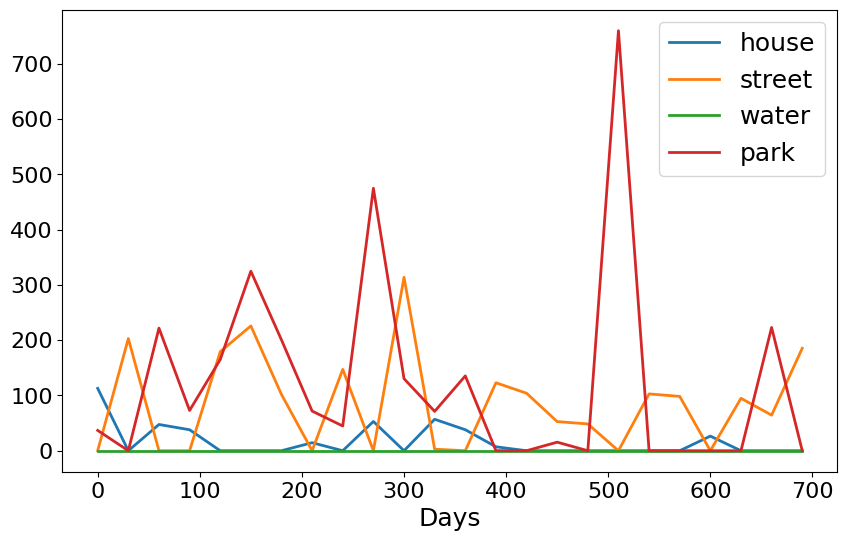

In [30]:
O_parque = np.array(O_parque)
O_rua = np.array(O_rua)
O_agua = np.array(O_agua)
O_casa = np.array(O_casa)

plt.figure(figsize=(10, 6))
plt.plot(days, O_casa, label="house", linewidth=2)
plt.plot(days, O_rua, label="street", linewidth=2)
plt.plot(days, O_agua, label="water", linewidth=2)
plt.plot(days, O_parque, label="park", linewidth=2)
plt.legend(fontsize=18)
plt.xlabel("Days", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


# Fase adulta

In [31]:
ADT_parque, ADT_rua, ADT_agua, ADT_casa = [],[],[],[]
for t in range(len(SantarenzinhoADT)):
    vetAdt = [SantarenzinhoADT[t],JdSantaremADT[t],RepublicaADT[t]]
    def f(x):
        return np.linalg.norm(matProporcoes@x - vetAdt)
    result = optimize.minimize(f, [0,0,0,0], bounds=[(0,None),(0,None),(0,None),(0,None)])
    print(result.x,result.fun)
    ADT_agua.append(result.x[0])
    ADT_parque.append(result.x[1])
    ADT_rua.append(result.x[2])
    ADT_casa.append(result.x[3])

[0.         0.45652307 0.         0.12357718] 0.02882973038235084
[0.         0.         0.25126994 0.        ] 0.07360254830191874
[0.         0.060876   0.         0.06753462] 0.03547169923080839
[0.        0.        0.1215533 0.       ] 0.024801593028877203
[0.         0.         0.25007613 0.        ] 0.03069974161802919
[0.         0.33240458 0.03001535 0.0090413 ] 0.01207009653323541
[0.       0.       0.066914 0.      ] 0.013177363353327547
[0.         0.         0.08987205 0.        ] 0.024874837193935757
[0.         0.         0.15905802 0.        ] 0.03019981288405436
[0.         0.07120094 0.1306221  0.        ] 0.012491383625197697
[0.         0.         0.40115106 0.        ] 0.02254341076585635
[0.         0.         0.20934925 0.        ] 0.02164011511883013
[0.         0.         0.41743408 0.        ] 0.03139625540858983
[0.         0.         0.13212272 0.        ] 0.01002872156607253
[0.        0.        0.0526307 0.       ] 0.024130060091825344
[0.         0.       

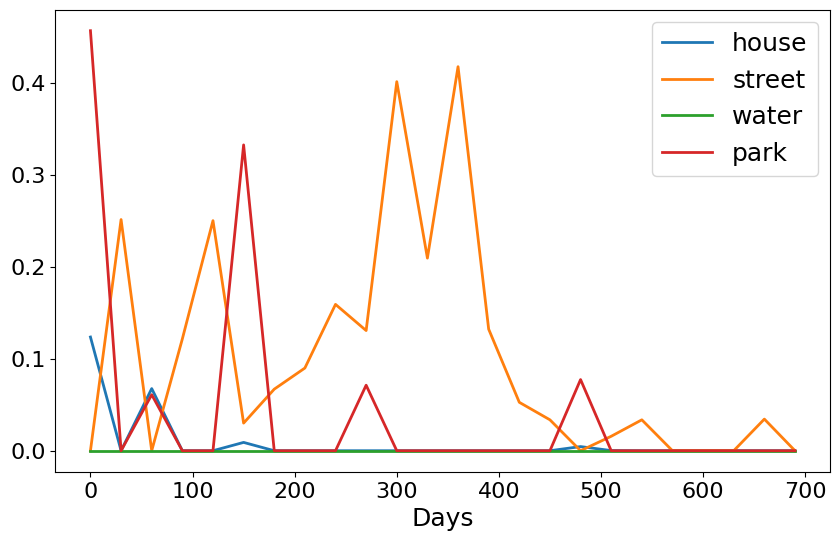

In [32]:

plt.figure(figsize=(10, 6))
plt.plot(days, ADT_casa, label="house", linewidth=2)
plt.plot(days, ADT_rua, label="street", linewidth=2)
plt.plot(days, ADT_agua, label="water", linewidth=2)
plt.plot(days, ADT_parque, label="park", linewidth=2)
plt.legend(fontsize=18)
plt.xlabel("Days", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


## Teste resultado

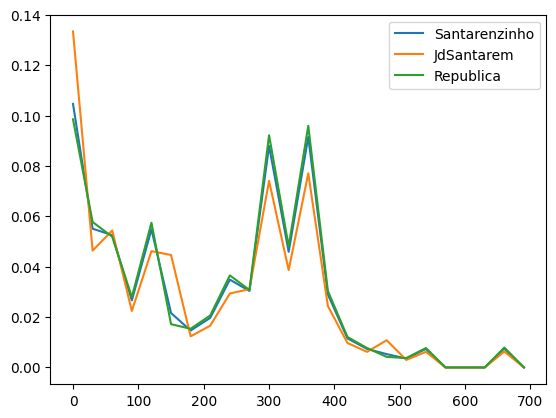

In [33]:
SantarenzinhoADTR = np.zeros(len(SantarenzinhoADT))
JdSantaremADTR = np.zeros(len(SantarenzinhoADT))
RepublicaADTR =np.zeros(len(SantarenzinhoADT))
for t in range(len(SantarenzinhoADT)):
    R = matProporcoes@[ADT_agua[t],ADT_parque[t],ADT_rua[t],ADT_casa[t]]
    SantarenzinhoADTR[t],JdSantaremADTR[t],RepublicaADTR[t] = R[0,0] , R[0,1], R[0,2]
plt.plot(days,SantarenzinhoADTR,label='Santarenzinho')
plt.plot(days,JdSantaremADTR,label='JdSantarem')
plt.plot(days,RepublicaADTR,label='Republica')
plt.legend()
plt.show()

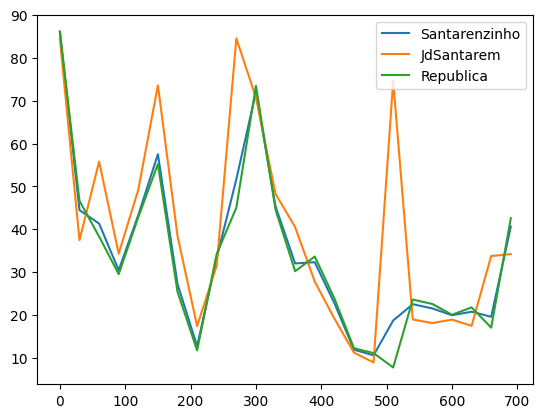

In [34]:
SantarenzinhoOR = np.zeros(len(SantarenzinhoOVT))
JdSantaremOR = np.zeros(len(SantarenzinhoOVT))
RepublicaOR =np.zeros(len(SantarenzinhoOVT))
for t in range(len(SantarenzinhoOVT)):
    R = matProporcoes@[O_agua[t],O_parque[t],O_rua[t],O_casa[t]]
    SantarenzinhoOR[t],JdSantaremOR[t],RepublicaOR[t] = R[0,0] , R[0,1], R[0,2]
plt.plot(days,SantarenzinhoOR,label='Santarenzinho')
plt.plot(days,JdSantaremOR,label='JdSantarem')
plt.plot(days,RepublicaOR,label='Republica')
plt.legend()
plt.show()

In [35]:
from scipy.stats import pearsonr
print("OVT:")
print("Santarenzinho:",pearsonr(SantarenzinhoOR,SantarenzinhoOVT)[0])
print("JdSantarem:",pearsonr(JdSantaremOR,JdSantaremOVT)[0])
print("Republica:",pearsonr(RepublicaOR,RepublicaOVT)[0])
print("ADT:")

print("Santarenzinho:",pearsonr(SantarenzinhoADTR,SantarenzinhoADT)[0])
print("JdSantarem:",pearsonr(JdSantaremADTR,JdSantaremADT)[0])
print("Republica:",pearsonr(RepublicaADTR,RepublicaADT)[0])

OVT:
Santarenzinho: 0.921794654858809
JdSantarem: 0.9931538367052536
Republica: 0.8873394444164917
ADT:
Santarenzinho: 0.923067271050152
JdSantarem: 0.9395358031070558
Republica: 0.9329727363152763


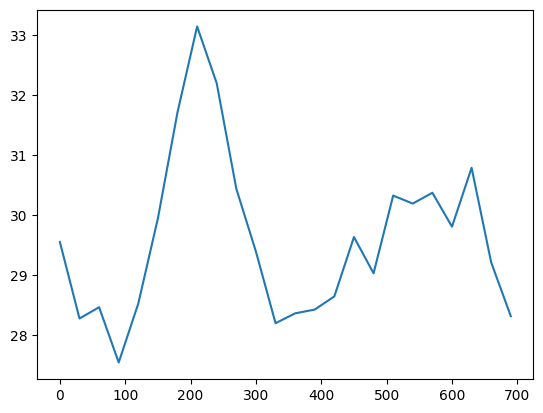

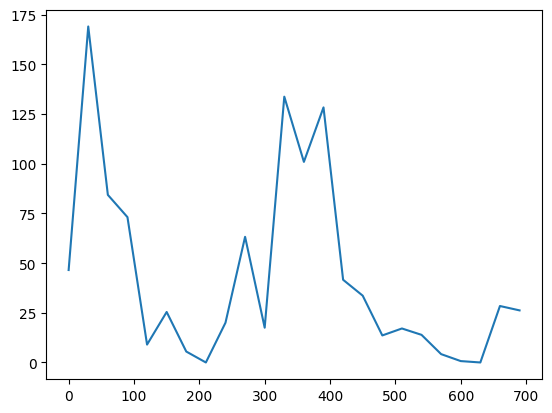

In [36]:
import readHistData as hist
temperatures = [hist.temperature(t) for t in days]
pluviosities = [hist.pluviosity(t) for t in days]
plt.plot(days,temperatures,label='Temperature')
plt.show()
plt.plot(days,pluviosities,label='Pluviosity')
plt.show()


In [37]:
#save Day, OVT_house, OVT_park, OVT_street, ADT_house, ADT_park, ADT_street, Temperature, Pluviosity to dataNew.csv
import pandas as pd
import readHistData as hist
data = {
    "Day": days,
    "OVT_house": O_casa,
    "OVT_park": O_parque,
    "OVT_street": O_rua,
    "ADT_house": ADT_casa,
    "ADT_park": ADT_parque,
    "ADT_street": ADT_rua,
    # Assuming Temperature and Pluviosity are defined elsewhere
    "Temperature": [hist.temperature(t) for t in days],  # Example temperature data
    "Pluviosity": [hist.pluviosity(t) for t in days]  # Example pluviosity data
}
df = pd.DataFrame(data)
df.to_csv("dataNew.csv", index=False)
